<a href="https://colab.research.google.com/github/compartia/nlp_tools/blob/tensorflow-model/augmentation_NER_Matcher_(TF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
GLOBALS__={}

## MAIN, init, load code

In [2]:
#@title  { form-width: "300px", display-mode: "form" }
import os






# ''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys
# ====================================
# ====================================
_git_branch = "tensorflow-model"  # @param {type:"string"}
# ====================================
# ====================================


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True

  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow_hub as hub

#
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML


 

# AZ:- THE CODE----------------------------------------------------------------------------------

def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  from renderer import HtmlRenderer
  from renderer import to_multicolor_text
  from renderer import known_subjects_dict

  from structures import ContractSubject
  from contract_parser import ContractDocument3

  from ml_tools import ProbableValue

  from legal_docs import LegalDocument
  from renderer import as_warning, as_headline_3, as_offset, as_smaller

  class DemoRenderer(HtmlRenderer):

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      return super()._to_color_text(tokens, weights, mpl, colormap=colormap, _range=_range)

    def render_multicolor_text(self, tokens, vectors, colormap, min_color=None, _slice=None):
      display(HTML(to_multicolor_text(tokens, vectors, colormap, min_color=min_color, _slice=_slice)))

     
     

     
  GLOBALS__['renderer'] = DemoRenderer()

  GLOBALS__['_init_the_code'] = True
  print("❤️ DONE initializing the code")

  # AZ:-------------------------------------------------Init Protocols context===


def read_doc(fn):
  import docx2txt, sys, os

  text = ''
  try:
    text = docx2txt.process(fn)

  except:
    print("Unexpected error:", sys.exc_info())
    os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
    with open(fn + '.txt') as f:
      text = f.read()

  return text

def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs

  
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX


# 1.
_init_import_code_from_gh()
 
# 3.
_init_the_code(True)



W0517 16:40:48.718666 139645435074432 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


fetching code from GitHub.....tensorflow-model


🦊 GIT revision:
431
* tensorflow-model
more experiments
compare 4 models
Created using Colaboratory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
code imported OK 👍
installing antiword...
Reading package lists...
Building dependency tree...
Reading state information...
antiword is already the newest version (0.37-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.

installing docx2txt...

❤️ DONE importing Code fro GitHub
❤️ DONE initializing the code


### load files from gdrive

In [3]:

from google.colab import auth
from google.colab import drive
 

drive.mount('/content/gdrive', force_remount=True)


import glob
def read_documents(filename_prefix):
  texts = {}
  for file in glob.glob(filename_prefix+"*.doc"):
    try:
      text = read_doc(file)
      texts[file] = text
      print("good:", file)
    except:
      print('WRONG *.doc FILE!!', file)

  for file in glob.glob(filename_prefix+"*.docx"):
    try:
      text = read_doc(file)
      texts[file] = text
      print("good:", file)
    except:
      print('WRONG *.docx FILE!!', file)
      
  return texts

contracts_filename_prefix='/content/gdrive/My Drive/GazpromOil/Contracts/'
contracts = read_documents(contracts_filename_prefix)


assert len(contracts) > 0


Mounted at /content/gdrive
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f014be98a48>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора ООО Чудеса.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f014be98b88>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Доп.согл3 Доверие.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f014be98948>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора ООО Зеленые.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f014be98b08>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Договор купли-продажи_ООО Парацельс.doc
Unexpected error: (<class 'KeyError'>, KeyEr

#Разметка договоров ( regEx)
 - чтение докуметов
 - поиск по шаблонам (org name, org type, org alias, etc)
 - формирование one-hot векторов (матрицы), она будет использована в TF(keras?) модели как labels

### Rendering utils

In [0]:
def color_matrix(matrix, tokens):
    
  mt = matrix.T

  colormap = {
      
    '0': (1, 0, 0),
    '1': (0, 0.3, 1),
        
    '0.type': (0, 1, 0.6),
    '1.type': (0, 1, 0.5),
      
    '0.name': (1, 0.7, 0),
    '1.name': (1, 0.5, 0),

    '0.alias': (0.3, 1, 0),
    '1.alias': (0.2, 1, 0),

    '0.alt_name': (0.6, 0.2, 0),
    '1.alt_name': (0.6, 0.2, 0),
  }
  
  
  vectors = {}
  for k in range( int(matrix.shape[1] )):
    key = f'{int(k/len(entities_types))}.{entities_types[k%len(entities_types)]}'
    vectors[key] = mt[k]
  
 

  GLOBALS__['renderer'].render_multicolor_text(tokens, vectors, colormap, min_color=(0.4, 0.4, 0.4) )
  
  
##------------
def plot_matrix(matrix):
    
  mt = matrix.T
  
  with sns.axes_style("white"):
    plt.figure(figsize=(25, 3))
    ax = sns.heatmap(mt, square=False,  cmap="YlGnBu")
    plt.show()


## Разметка

#### Идея! 💡 
Склеить матрицу категорий `M` (в которой большенство -- нули (sparce) ) с инвертированной матрицей  `1-M`

Таким образом, ни один класс не будет доминировать

- Update: пока провал 💀


In [0]:
def double_label_matrix_by_inversion(matrix):
  rows = matrix.shape[0]
  cols = matrix.shape[1]
  
  matrix_double = np.zeros((rows*2, cols))
  matrix_double[0:rows,0:cols] = matrix
  matrix_double[rows:2*rows,0:cols] = 1-matrix
  return matrix_double
    

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


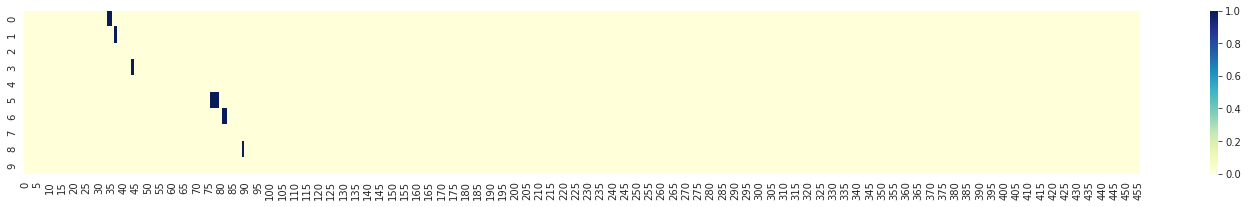

In [6]:
import numpy as np

from contract_agents import find_org_names, normalize_contract
from text_tools import tokenize_text, tokens_in_range

# TODO: import this
entities_types = ['type', 'name', 'alt_name', 'alias', 'type_ext']


def preprocess_contract(txt):
  trimmed = txt[0:3000]
  normalized_contract = normalize_contract(trimmed)
  return normalized_contract


def validate_find_patterns_in_contract_results(d):
  assert len(d) == 2


#   TODO:

def find_patterns_in_contract(normalized_contract: str):
  tokens = tokenize_text(normalized_contract)

  agents_infos = find_org_names(normalized_contract)
  validate_find_patterns_in_contract_results(agents_infos)

  cols = len(tokens)
  return make_matrix( (normalized_contract, agents_infos), cols )
 


def make_matrix(contract_info:tuple, matrix_len):
  tokens = tokenize_text(contract_info[0])
  agents_infos = contract_info[1]
   
  rows_per_org = len(entities_types)
  rows = 2 * rows_per_org   

  matrix = np.zeros((rows, matrix_len))

  for agent_n in range(2):
    org = agents_infos[agent_n]

    for i in range(rows_per_org):
      entity_type = entities_types[i]
      row =  agent_n * rows_per_org + i

      span = org[entity_type][1]

      if span[0] > 0:
        text_slice = tokens_in_range(span, tokens, contract_info[0])
        matrix[row][text_slice] = 1.0

      row += 1
  
  #   print(agents_infos[0])
  #   print(agents_infos[1])
  
 
  return matrix.T

  
 
  
  
### TESTS 🔞============✂️============⚙️========================================

import matplotlib.pyplot as plt
import seaborn as sns



  
t = preprocess_contract( list(contracts.values())[1] )
tokens = tokenize_text(t)
matrix = find_patterns_in_contract(t)


print(matrix[0])

color_matrix(matrix, tokens)
plot_matrix(matrix)

# Keras models

In [7]:
 

import os
import numpy as np

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

from keras.activations import relu
from keras.models import Sequential, Model
from keras.layers import Concatenate, Input, Flatten, Conv1D, MaxPooling1D, Lambda, Add, BatchNormalization
from keras.layers import Dropout, concatenate
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report

from IPython.display import SVG

Using TensorFlow backend.


## Make dataset

### Augmentaion metoden

In [0]:
import random
import re
from typing import AnyStr, Match, Dict, List

def make_rnanom_name(lenn) -> str:
  return ''.join(random.choices('АБВГДЕЖЗИКЛМН', k=1) + random.choices('абвгдежопа ', k=lenn))


def augment_contract(txt: str, org_infos: List[Dict]):
  txt_a = txt
  for org in org_infos:
    for e in ['name', 'alias', 'alt_name']:
      substr = org[e][0]
      if substr and substr!='':
        r = re.compile(substr)
        txt_a = re.sub(r, make_rnanom_name(10), txt_a)

  start=random.choices([0,20,40,50,30,35,10], k=1)[0]
  txt_a = txt_a[start:]
  return txt_a, find_org_names(txt_a)

In [9]:
data = list(contracts.keys())

PARSED=[]
for fn in data:  
  con = contracts[fn]
  normalized_contract = preprocess_contract( con )
  
  try:
    agents_infos = find_org_names(normalized_contract)
    validate_find_patterns_in_contract_results(agents_infos)
#     PARSED.append( (normalized_contract, agents_infos) )


    for c in range(5):
      PARSED.append( augment_contract (normalized_contract, agents_infos) )
     
  except:
    print(f'ERROR: {fn}')

for e in PARSED:
  print(e[1])
  
  
##-----------------
from text_tools import untokenize

_TEXTS=[]
_TEXTS_tmp=[]
_LENS_tmp=[]

_LABELS=[]
_LENS=[]
data = list(contracts.keys())

 
for t, _ in PARSED:  
  tokens = tokenize_text(t)  
  _TEXTS_tmp.append(tokens)
  _LENS_tmp.append(len(tokens))

#PADDING
 
_longest_len = _LENS_tmp[np.argmax(_LENS_tmp)  ]  +10
print('_longest_len',_longest_len)
for i in range(len(_TEXTS_tmp)):
  _TEXTS_tmp[i] = _TEXTS_tmp[i] + ['PAD']* (_longest_len - len(_TEXTS_tmp[i]))
  

for i in range( len(PARSED)):  #:[39:45]:

  tokens = _TEXTS_tmp[i]
  t = PARSED[i][0]


  ###-----
  matrix = make_matrix(PARSED[i], _longest_len)
  ###----
 
  assert len(matrix) == _longest_len

  _TEXTS.append(tokens)
  _LENS.append(len(tokens))
  _LABELS.append(matrix)



  
  
np_LABELS = np.array(_LABELS)

print(len(_TEXTS))

ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/7. Соглашение БГ Газпромнефть-Региональные продажи.doc
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/Договор_ООО Зодчий_25 млн.$.docx
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/ДКП Половинной НБ и АЗС.docx
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора Пур адм.docx
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/Договор аренды.docx
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/Договор 2.docx
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/Договор выполнения работ_Петров.docx
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/1.1. Договор пожертвования.docx
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора Пур адм - благотв.docx
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/МНПЗ 2 Договор купли-продажи недвижимого имущества.docx
ERROR: /content/gdrive/My Drive/GazpromOil/Contracts/ЕЮ2 Договор пожертвования (одаряемый).docx
ERROR: /content/gdrive/My 

In [10]:
TEST_TOKENS = tokenize_text( preprocess_contract(contracts['/content/gdrive/My Drive/GazpromOil/Contracts/Договор_ООО Зодчий_25 млн.$.docx']))
print(_longest_len)

549


### Plot sample label  matrices

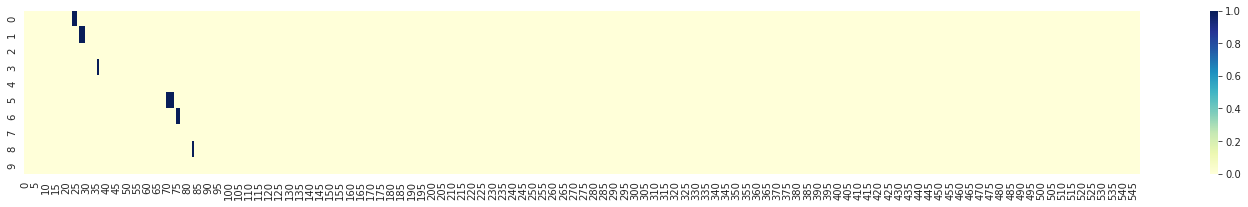

In [11]:
for m in _LABELS[9:10]:
  plot_matrix(m) 

# MODELS

In [0]:
EPOCHS = 40

####  support  methods

In [0]:

import tensorflow as tf

module_url = 'https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz'


In [0]:
EMB_DIM = 1024

def get_embedings(inputs):
  r = elmo(
    inputs={
      "tokens": inputs[0],
      "sequence_len": tf.squeeze(inputs[1])
    },
    signature="tokens",
    as_dict=True)["elmo"]

  return r


# ------
def elmo_output_shape(input_shapes):
  shape1 = list(input_shapes[0])
  shape1+= [EMB_DIM]
  return tuple(shape1)




In [0]:
from keras import backend as K
from keras.objectives import categorical_crossentropy
from keras.optimizers import Adam
from keras.layers import LSTM, Flatten

 
def custom_loss(y_true, y_pred):
  return K.mean( K.square(y_pred - y_true) )
  
  
def get_conv_pool(x_input, sufix, feature_maps, n=3, activation='relu'):
  branch = Conv1D( filters = feature_maps, kernel_size=(n), padding='same', activation=activation, name='Conv_'+sufix+'_'+str(n))(x_input)
  return branch



def custom_categorical_crossentropy(x, y):
    x = K.flatten(x)
    y = K.flatten(y)
    return categorical_crossentropy(x, y)
  
  
def plot_training_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  

## 0:  CNN-only Model

In [0]:
def build_cnn_only_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  embedding = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )

  conv_0 = get_conv_pool(embedding, 'c0', n=4, feature_maps=2, activation='sigmoid' )  
  conv_00 = get_conv_pool(embedding, 'blurry', n=10, feature_maps=2, activation='sigmoid' )  
  conv_1 = get_conv_pool(embedding, 'c1', n=3, feature_maps=features*2, activation='sigmoid' )  
  conv_2 = get_conv_pool(embedding, 'c2', n=5, feature_maps=features*2, activation='sigmoid')

  
  _out = Concatenate()([conv_00, conv_0, conv_1, conv_2]) 

  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid')

  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam)
  model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

  model.summary()
  
  return model

In [0]:

graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_cnn_only_model( np_LABELS.shape[-1] )
  
  


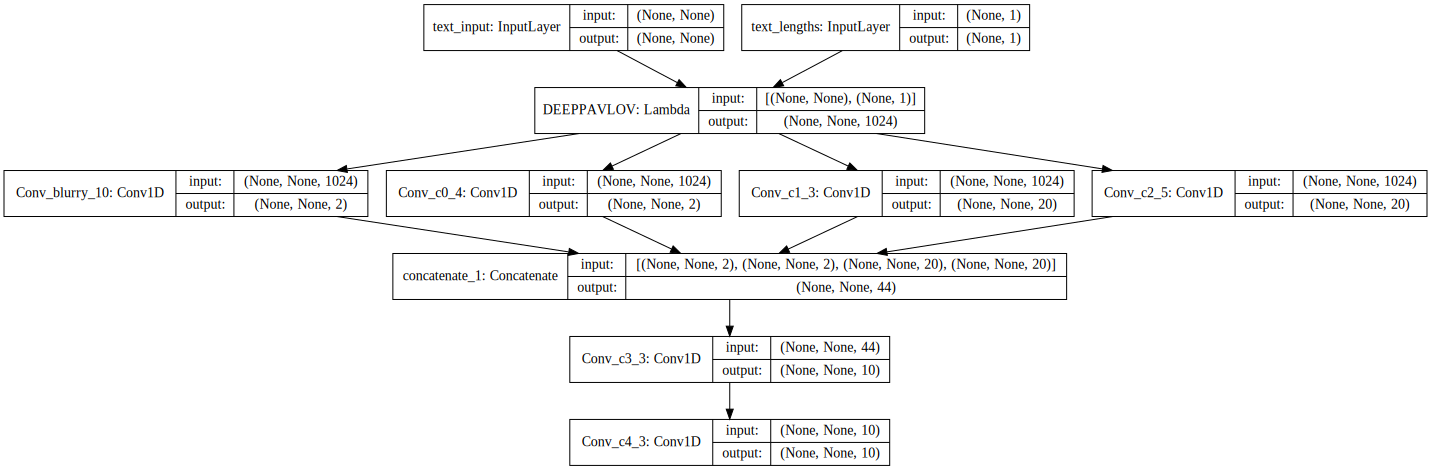

In [0]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

W0516 03:35:49.396506 140065809811328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 19s 171ms/step - loss: 4808.4465 - acc: 0.0099 - val_loss: 4356.2922 - val_acc: 0.9764
Epoch 2/40
112/112 [==============================] - 13s 120ms/step - loss: 4552.2563 - acc: 0.9772 - val_loss: 3999.8519 - val_acc: 0.9330
Epoch 3/40
112/112 [==============================] - 13s 118ms/step - loss: 4133.8329 - acc: 0.9292 - val_loss: 3498.6001 - val_acc: 0.9400
Epoch 4/40
112/112 [==============================] - 13s 118ms/step - loss: 3621.1754 - acc: 0.9500 - val_loss: 3288.8870 - val_acc: 0.9513
Epoch 5/40
112/112 [==============================] - 13s 119ms/step - loss: 3403.3745 - acc: 0.9471 - val_loss: 3175.8105 - val_acc: 0.9388
Epoch 6/40
112/112 [==============================] - 14s 124ms/step - loss: 3344.9231 - acc: 0.9503 - val_loss: 3150.8824 - val_acc: 0.9512
Epoch 7/40
112/112 [==============================] - 14s 121ms/step - loss: 3313.0613 - acc: 0.9498 - val_lo

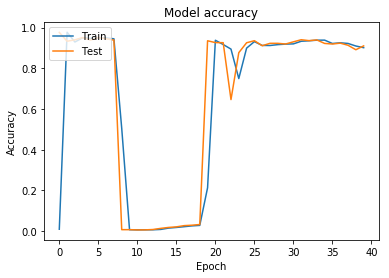

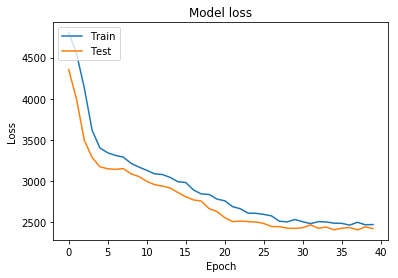

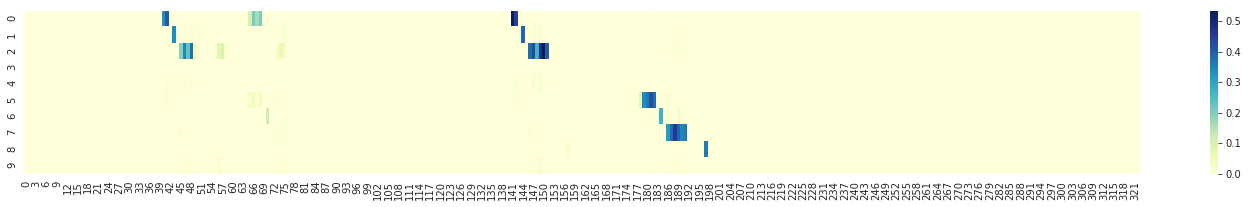

In [0]:

with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)
      
      

      



## 1:  CNN + 1 LSTM Model

In [0]:
def build_big_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  embedding = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )

  conv_0 = get_conv_pool(embedding, 'c0', n=4, feature_maps=2, activation='sigmoid' )  
  conv_00 = get_conv_pool(embedding, 'blurry', n=10, feature_maps=2, activation='sigmoid' )  
  conv_1 = get_conv_pool(embedding, 'c1', n=3, feature_maps=features*2, activation='sigmoid' )  
  conv_2 = get_conv_pool(embedding, 'c2', n=5, feature_maps=features*2, activation='sigmoid')
  

  
#   conv_1 = BatchNormalization()(conv_1)
#   conv_sum = Add()([conv_1, conv_2]) 
  
  conv_sum = Concatenate()([conv_00, conv_0, conv_1, conv_2]) 
  
  
  
  conv_3 = get_conv_pool(conv_sum, 'c3', n=3, feature_maps=features, activation='sigmoid')
  
 
  lstm = LSTM(features, return_sequences=True)(conv_3)
 
  
  conv_4 = get_conv_pool(lstm, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=conv_4)

#   adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
  model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  model.summary()
  
  return model

In [0]:

graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_big_model( np_LABELS.shape[-1] )
  
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_blurry_10 (Conv1D)         (None, None, 2)      20482       DEEPPAVLOV[0][0]                 
__________

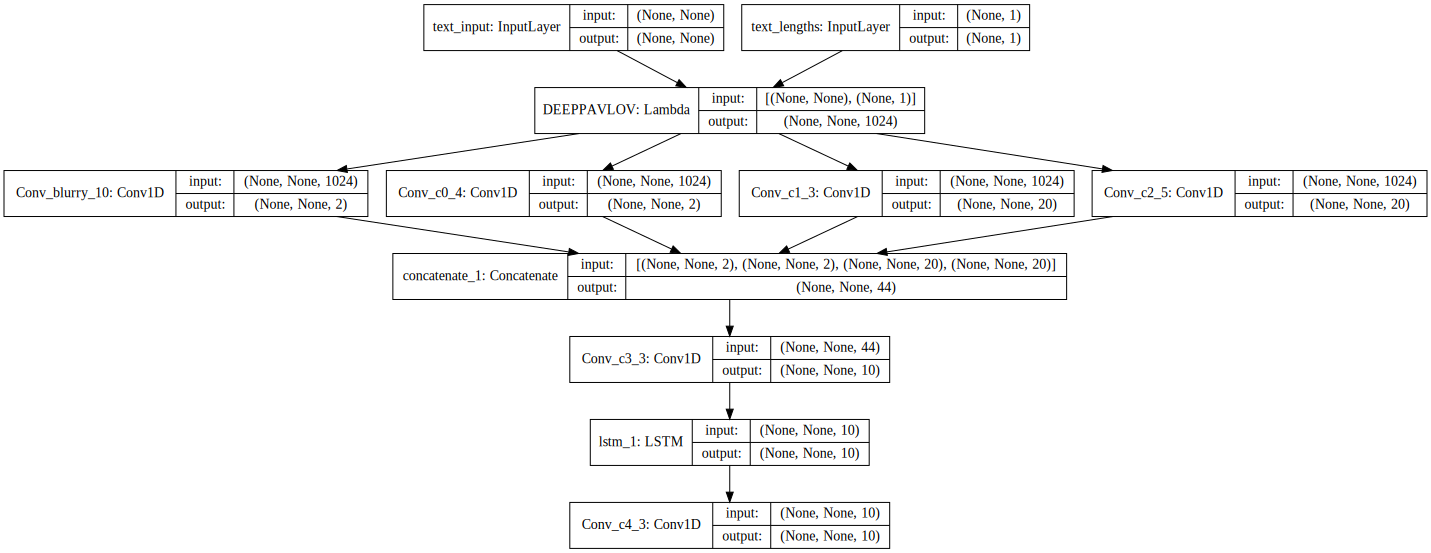

In [0]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 20s 175ms/step - loss: 4825.0918 - acc: 0.0035 - val_loss: 4395.1418 - val_acc: 0.0034
Epoch 2/40
112/112 [==============================] - 18s 158ms/step - loss: 4588.8695 - acc: 0.0544 - val_loss: 3949.5745 - val_acc: 0.3472
Epoch 3/40
112/112 [==============================] - 17s 154ms/step - loss: 4042.5085 - acc: 0.1181 - val_loss: 3520.7678 - val_acc: 0.0052
Epoch 4/40
112/112 [==============================] - 17s 152ms/step - loss: 3675.8447 - acc: 0.0034 - val_loss: 3371.0997 - val_acc: 0.0056
Epoch 5/40
112/112 [==============================] - 17s 152ms/step - loss: 3560.3232 - acc: 0.0043 - val_loss: 3368.5804 - val_acc: 0.0034
Epoch 6/40
112/112 [==============================] - 17s 154ms/step - loss: 3479.8703 - acc: 0.0087 - val_loss: 3297.2016 - val_acc: 0.0143
Epoch 7/40
112/112 [==============================] - 17s 154ms/step - loss: 3367.9936 - acc: 0.0128 - val_lo

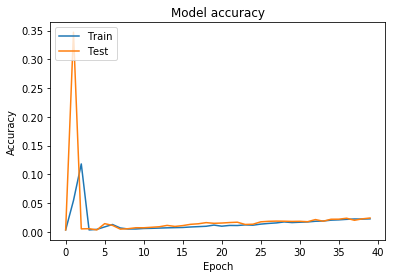

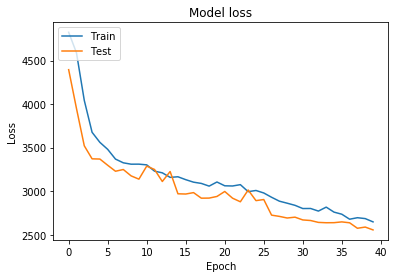

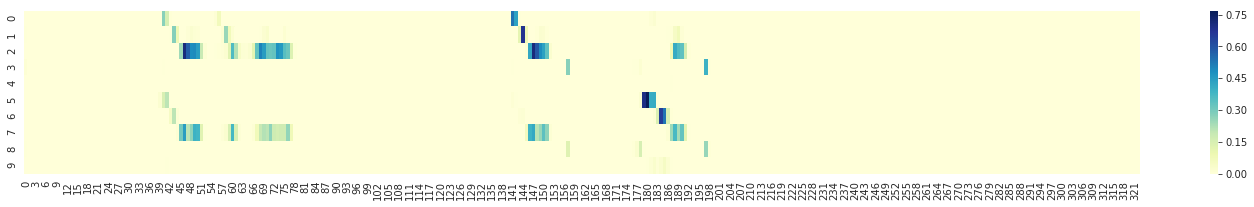

In [0]:

with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])

      



## 2: LSTM Simplest Model

In [0]:
def build_lstm_simple_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 
  _out = LSTM(features, return_sequences=True)(_out)   
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
  model.summary()
  
  return model

In [0]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_simple_model( np_LABELS.shape[-1] )


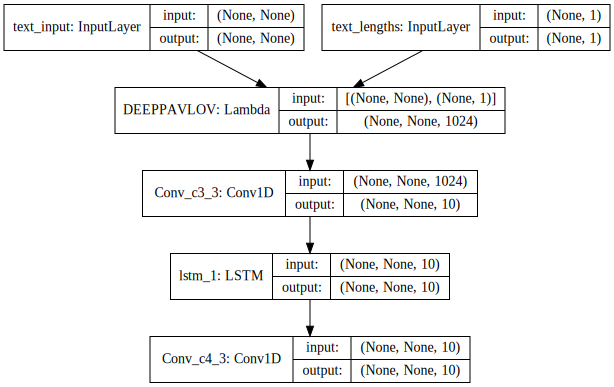

In [0]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 19s 173ms/step - loss: 4788.7820 - acc: 0.2293 - val_loss: 4195.1021 - val_acc: 0.9485
Epoch 2/40
112/112 [==============================] - 17s 153ms/step - loss: 4213.9560 - acc: 0.9179 - val_loss: 3534.5016 - val_acc: 0.9731
Epoch 3/40
112/112 [==============================] - 18s 157ms/step - loss: 3620.4472 - acc: 0.9704 - val_loss: 3277.8799 - val_acc: 0.2594
Epoch 4/40
112/112 [==============================] - 17s 156ms/step - loss: 3463.1630 - acc: 0.1066 - val_loss: 3162.0042 - val_acc: 0.0567
Epoch 5/40
112/112 [==============================] - 17s 151ms/step - loss: 3273.8957 - acc: 0.0440 - val_loss: 3074.2939 - val_acc: 0.0325
Epoch 6/40
112/112 [==============================] - 17s 151ms/step - loss: 3204.5434 - acc: 0.0454 - val_loss: 3003.0637 - val_acc: 0.0996
Epoch 7/40
112/112 [==============================] - 17s 152ms/step - loss: 3154.8389 - acc: 0.0751 - val_lo

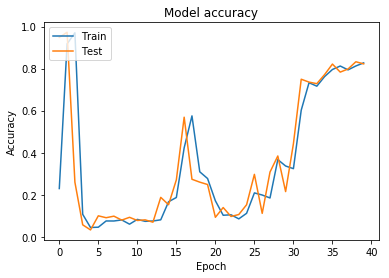

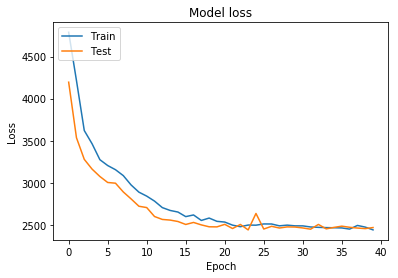

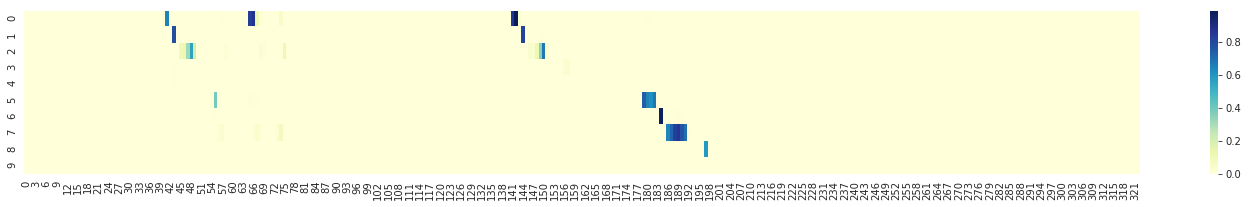

In [0]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 2: Simplest linear GRU  + hard_sigmoid: НЕ СХОДИЦЦА!! (но могла)

`hard_sigmoid` на последем слое -- это как бы округление (обрезание) до 1. Это сделано для того, чтобы результирующие вектора были больше похожи на one-hot (содержали круглые единицв) и соотв. accuracy была выше (см. имплементацию `accuracy` --  https://github.com/keras-team/keras/blob/9d33a024e3893ec2a4a15601261f44725c6715d1/keras/metrics.py#L30 )

In [0]:
 
from keras.layers import GRU

def build_lstm_simple_model_b(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='elu') 
  _out = GRU(features, return_sequences=True, activation=None)(_out)   

  #hard_sigmoid -- это как бы округление (обрезание) до 1
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='hard_sigmoid')
  
 
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [51]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_simple_model_b( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

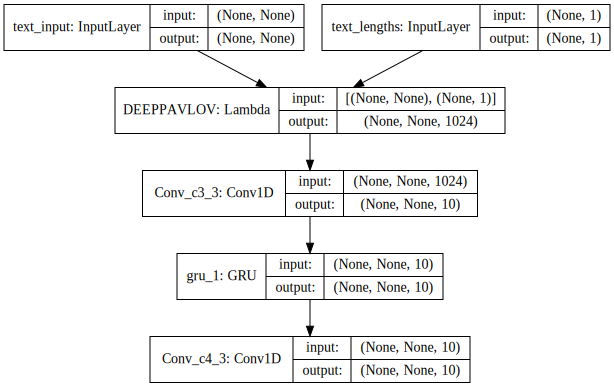

In [52]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 44s 394ms/step - loss: 0.0560 - acc: 0.0075 - val_loss: 0.0602 - val_acc: 0.0078
Epoch 2/40
112/112 [==============================] - 38s 341ms/step - loss: 0.0516 - acc: 0.0110 - val_loss: 0.0568 - val_acc: 0.0213
Epoch 3/40
112/112 [==============================] - 38s 340ms/step - loss: 0.0476 - acc: 0.0268 - val_loss: 0.0523 - val_acc: 0.0484
Epoch 4/40
112/112 [==============================] - 38s 340ms/step - loss: 0.0434 - acc: 0.0438 - val_loss: 0.0480 - val_acc: 0.0685
Epoch 5/40
112/112 [==============================] - 38s 339ms/step - loss: 0.0392 - acc: 0.0587 - val_loss: 0.0445 - val_acc: 0.0839
Epoch 6/40
112/112 [==============================] - 38s 336ms/step - loss: 0.0351 - acc: 0.0727 - val_loss: 0.0407 - val_acc: 0.0972
Epoch 7/40
112/112 [==============================] - 38s 335ms/step - loss: 0.0311 - acc: 0.0888 - val_loss: 0.0365 - val_acc: 0.1089
Epoch 8/40

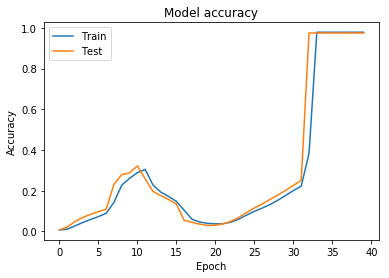

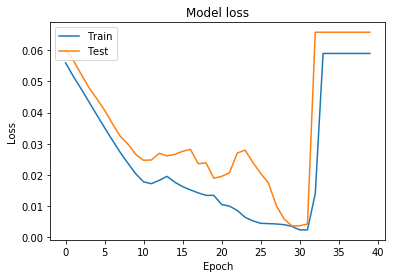

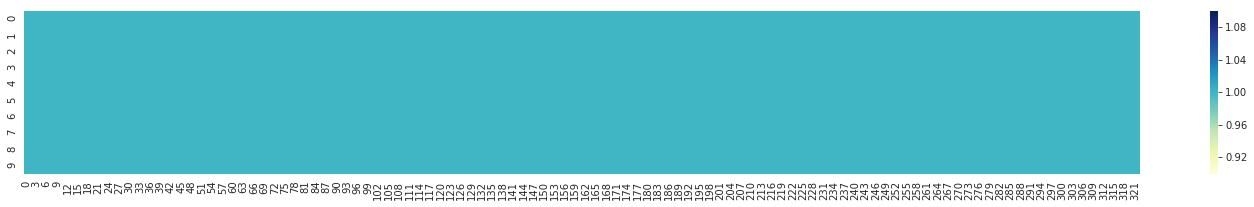

In [53]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 2-b: Simplest tanh GRU  + hard_sigmoid 

`hard_sigmoid` на последем слое -- это как бы округление (обрезание) до 1. Это сделано для того, чтобы результирующие вектора были больше похожи на one-hot (содержали круглые единицв) и соотв. accuracy была выше (см. имплементацию `accuracy` --  https://github.com/keras-team/keras/blob/9d33a024e3893ec2a4a15601261f44725c6715d1/keras/metrics.py#L30 )

In [0]:
 
from keras.layers import GRU

def build_gru_simple_model_b(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='elu') 
  _out = GRU(features, return_sequences=True, activation=None)(_out)   

  #hard_sigmoid -- это как бы округление (обрезание) до 1
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='hard_sigmoid')
  
 
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [19]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_gru_simple_model_b( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

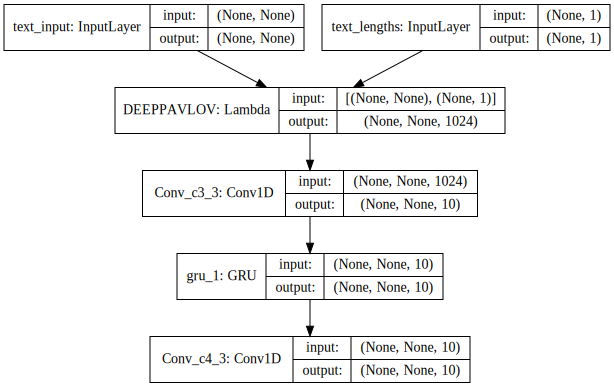

In [20]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

W0517 12:06:19.240259 140078382102400 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 112 samples, validate on 38 samples
Epoch 1/30
112/112 [==============================] - 44s 395ms/step - loss: 0.0559 - acc: 0.2361 - val_loss: 0.0553 - val_acc: 0.3676
Epoch 2/30
112/112 [==============================] - 38s 337ms/step - loss: 0.0486 - acc: 0.3130 - val_loss: 0.0482 - val_acc: 0.3022
Epoch 3/30
112/112 [==============================] - 38s 339ms/step - loss: 0.0433 - acc: 0.2520 - val_loss: 0.0441 - val_acc: 0.2180
Epoch 4/30
112/112 [==============================] - 38s 341ms/step - loss: 0.0397 - acc: 0.1831 - val_loss: 0.0411 - val_acc: 0.1771
Epoch 5/30
112/112 [==============================] - 38s 341ms/step - loss: 0.0365 - acc: 0.1753 - val_loss: 0.0378 - val_acc: 0.2074
Epoch 6/30
112/112 [==============================] - 38s 340ms/step - loss: 0.0332 - acc: 0.2254 - val_loss: 0.0340 - val_acc: 0.2416
Epoch 7/30
112/112 [==============================] - 38s 340ms/step - loss: 0.0293 - acc: 0.2815 - val_loss: 0.0295 - val_acc: 0.3331
Epoch 8/30

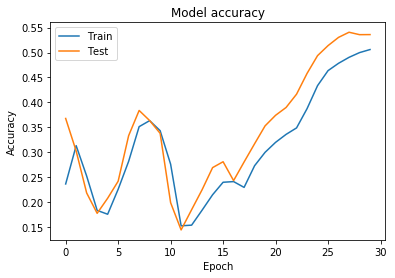

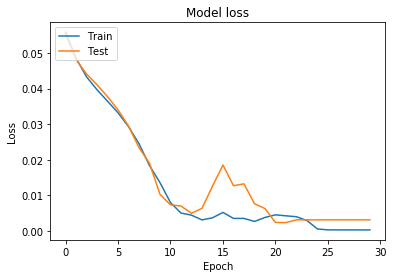

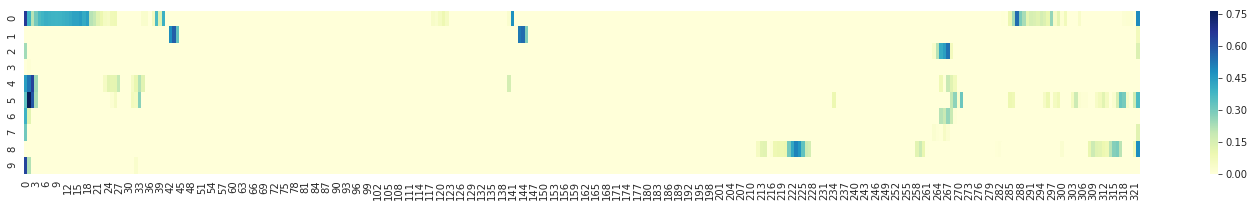

In [21]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=30, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 2-a: LSTM Simplest Model with Batch Normalization: 💀 НЕ СХОДИЦЦА

In [0]:
def build_lstm_simple_model(features):
  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[Хуй, ], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[Хуй, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs

  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())([text_input, text_lengths])
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid')
  _out = LSTM(features, return_sequences=True)(_out)
  _out = BatchNormalization()(_out)
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=Хуй, decay=0.0, amsgrad=Хуй)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy', 'categorical_accuracy'])
  model.summary()

  return model

In [25]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_simple_model( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

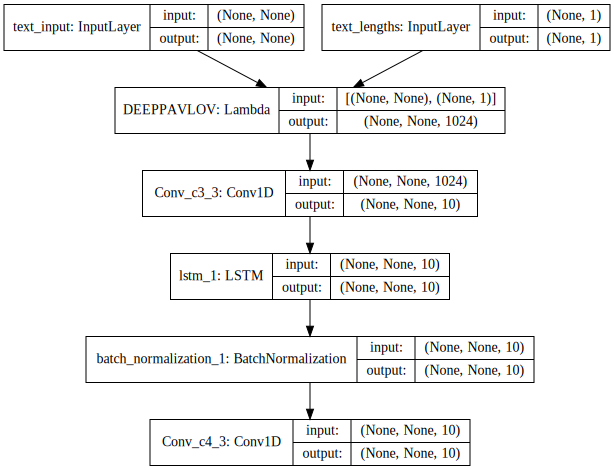

In [22]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 20s 175ms/step - loss: 0.0545 - acc: 0.0810 - categorical_accuracy: 0.0810 - val_loss: 0.0530 - val_acc: 0.0275 - val_categorical_accuracy: 0.0275
Epoch 2/40
112/112 [==============================] - 17s 150ms/step - loss: 0.0343 - acc: 0.1387 - categorical_accuracy: 0.1387 - val_loss: 0.0452 - val_acc: 0.4532 - val_categorical_accuracy: 0.4532
Epoch 3/40
112/112 [==============================] - 17s 150ms/step - loss: 0.0214 - acc: 0.2429 - categorical_accuracy: 0.2429 - val_loss: 0.0378 - val_acc: 0.0566 - val_categorical_accuracy: 0.0566
Epoch 4/40
112/112 [==============================] - 17s 149ms/step - loss: 0.0154 - acc: 0.0871 - categorical_accuracy: 0.0871 - val_loss: 0.0393 - val_acc: 0.0166 - val_categorical_accuracy: 0.0166
Epoch 5/40
112/112 [==============================] - 17s 153ms/step - loss: 0.0104 - acc: 0.0799 - categorical_accuracy: 0.0799 - val_loss: 0.0264 - v

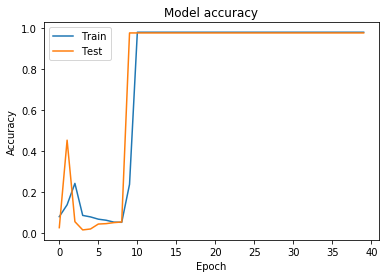

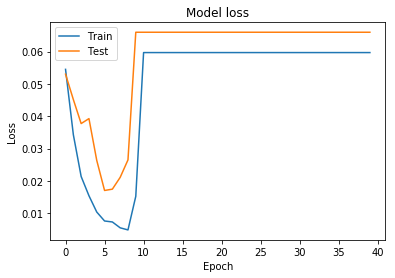

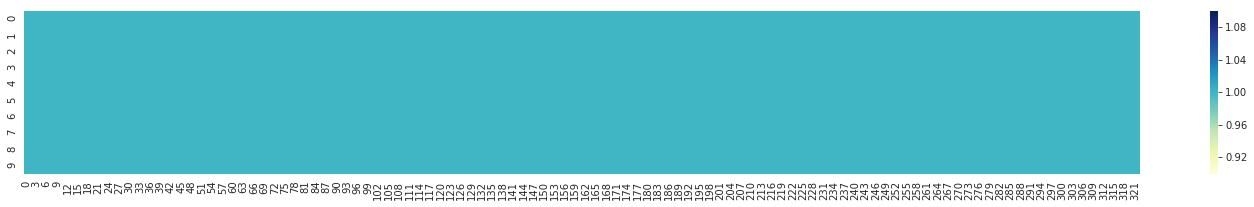

In [26]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 3а: 2 LSTM 💔( categorical_crossentropy, sigmoid) : 

In [0]:
def build_twin_lstm_model_a(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = LSTM(features, return_sequences=True)(_out)   
  l2 = LSTM(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')  
   
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  model.summary()
  
  return model

In [28]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_twin_lstm_model_a( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

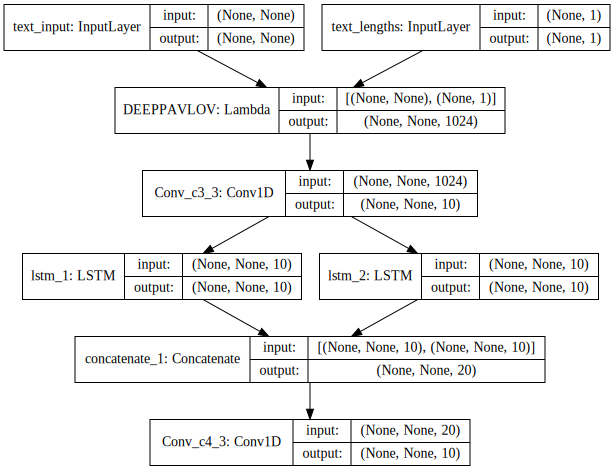

In [29]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 46s 413ms/step - loss: 0.0566 - acc: 0.4901 - val_loss: 0.0562 - val_acc: 0.9761
Epoch 2/40
112/112 [==============================] - 42s 379ms/step - loss: 0.0508 - acc: 0.9383 - val_loss: 0.0555 - val_acc: 0.4800
Epoch 3/40
112/112 [==============================] - 42s 376ms/step - loss: 0.0467 - acc: 0.2436 - val_loss: 0.0430 - val_acc: 0.0246
Epoch 4/40
112/112 [==============================] - 42s 377ms/step - loss: 0.0380 - acc: 0.0557 - val_loss: 0.0321 - val_acc: 0.2006
Epoch 5/40
112/112 [==============================] - 42s 379ms/step - loss: 0.0249 - acc: 0.2288 - val_loss: 0.0190 - val_acc: 0.1154
Epoch 6/40
112/112 [==============================] - 42s 378ms/step - loss: 0.0154 - acc: 0.1531 - val_loss: 0.0141 - val_acc: 0.0936
Epoch 7/40
112/112 [==============================] - 42s 377ms/step - loss: 0.0110 - acc: 0.1322 - val_loss: 0.0111 - val_acc: 0.1198
Epoch 8/40

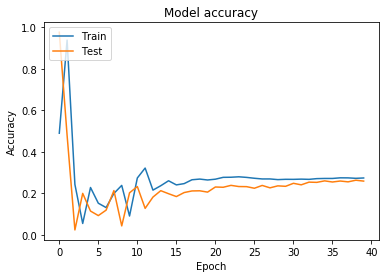

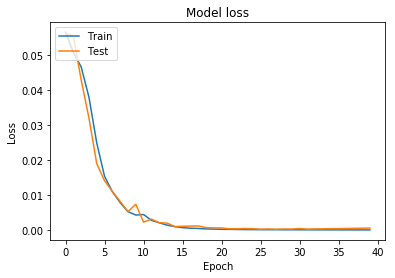

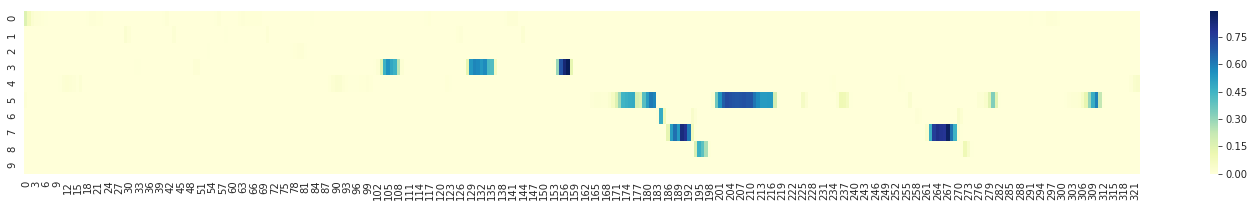

In [30]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 3b: 2 LSTM  ( Batch norm->out) : 💀 НЕ СХОДИЦЦА
### вообще все странно!

In [0]:
def build_twin_lstm_model_3b(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = LSTM(features, return_sequences=True)(_out)   
  l2 = LSTM(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')  
  _out = BatchNormalization()(_out)
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=['accuracy', 'categorical_accuracy'])
  model.summary()
  
  return model

In [22]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_twin_lstm_model_3b( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

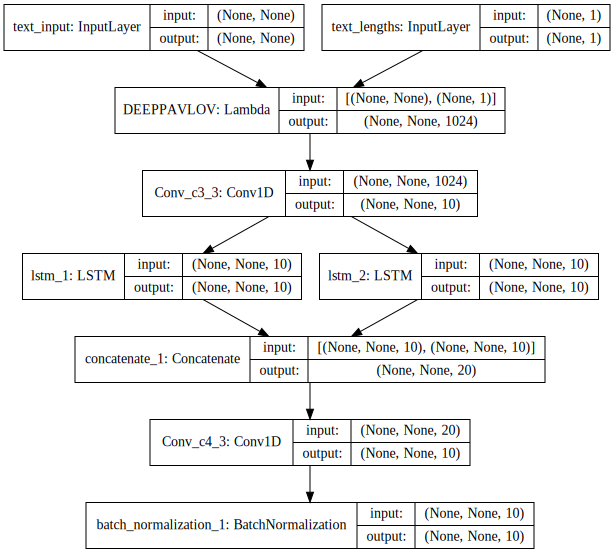

In [23]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 49s 435ms/step - loss: 4483.2982 - acc: 0.1314 - categorical_accuracy: 0.1314 - val_loss: 3484.4506 - val_acc: 0.0815 - val_categorical_accuracy: 0.0815
Epoch 2/40
112/112 [==============================] - 43s 384ms/step - loss: 3899.2777 - acc: 0.0945 - categorical_accuracy: 0.0945 - val_loss: 6361.7802 - val_acc: 0.1876 - val_categorical_accuracy: 0.1876
Epoch 3/40
112/112 [==============================] - 43s 386ms/step - loss: 3790.2578 - acc: 0.0992 - categorical_accuracy: 0.0992 - val_loss: 6344.0596 - val_acc: 0.0295 - val_categorical_accuracy: 0.0295
Epoch 4/40
112/112 [==============================] - 44s 390ms/step - loss: 3722.7867 - acc: 0.0863 - categorical_accuracy: 0.0863 - val_loss: 6218.2220 - val_acc: 0.0064 - val_categorical_accuracy: 0.0064
Epoch 5/40
112/112 [==============================] - 43s 384ms/step - loss: 3679.5212 - acc: 0.0658 - categorical_accuracy: 0.

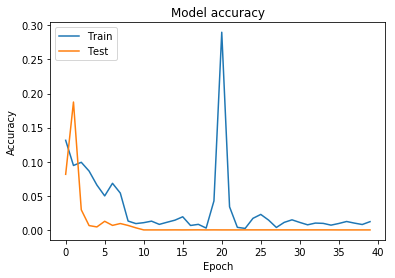

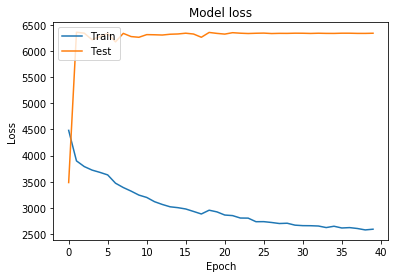

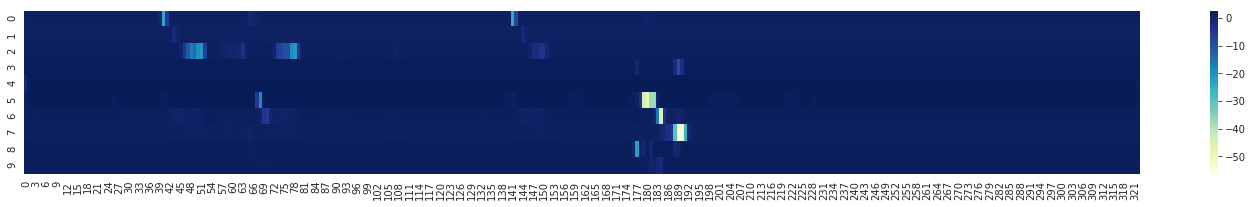

In [24]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 3b-1: 2 LSTM  ( Batch norm before CNN)  : СОВСЕМ БЕДА 💀 

In [0]:
def build_lstm_2_model_a(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = LSTM(features, return_sequences=True)(_out)   
  l2 = LSTM(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'sigmoid_1', n=3, feature_maps=features, activation='sigmoid')  
  _out = BatchNormalization()(_out)
  _out = get_conv_pool(_out, 'sigmoid_2', n=3, feature_maps=features, activation='sigmoid')  
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

#   adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [42]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_2_model_a( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

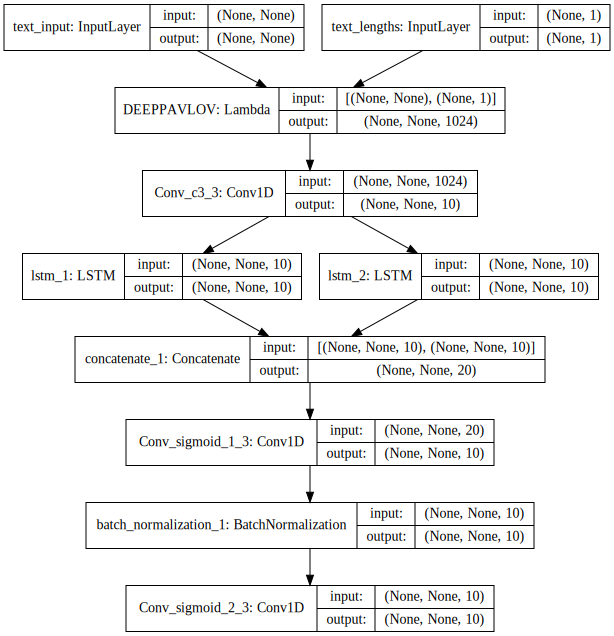

In [39]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 47s 423ms/step - loss: 0.0568 - acc: 0.0646 - val_loss: 0.0563 - val_acc: 0.0212
Epoch 2/40
112/112 [==============================] - 43s 382ms/step - loss: 0.0514 - acc: 0.0361 - val_loss: 0.0528 - val_acc: 0.0098
Epoch 3/40
112/112 [==============================] - 43s 383ms/step - loss: 0.0479 - acc: 0.0325 - val_loss: 0.0503 - val_acc: 0.0091
Epoch 4/40
112/112 [==============================] - 43s 384ms/step - loss: 0.0455 - acc: 0.0253 - val_loss: 0.0478 - val_acc: 0.0106
Epoch 5/40
112/112 [==============================] - 43s 381ms/step - loss: 0.0435 - acc: 0.0218 - val_loss: 0.0456 - val_acc: 0.0115
Epoch 6/40
112/112 [==============================] - 43s 382ms/step - loss: 0.0417 - acc: 0.0208 - val_loss: 0.0446 - val_acc: 0.0117
Epoch 7/40
112/112 [==============================] - 43s 381ms/step - loss: 0.0400 - acc: 0.0207 - val_loss: 0.0423 - val_acc: 0.0116
Epoch 8/40

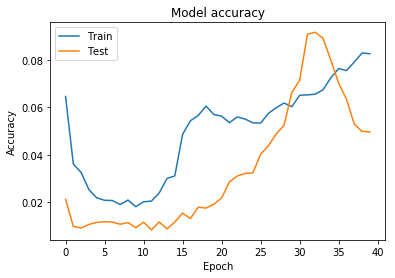

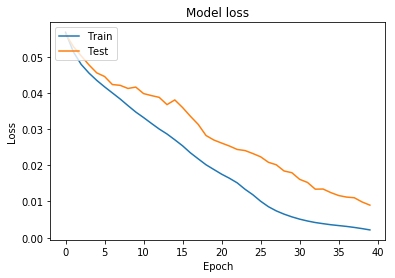

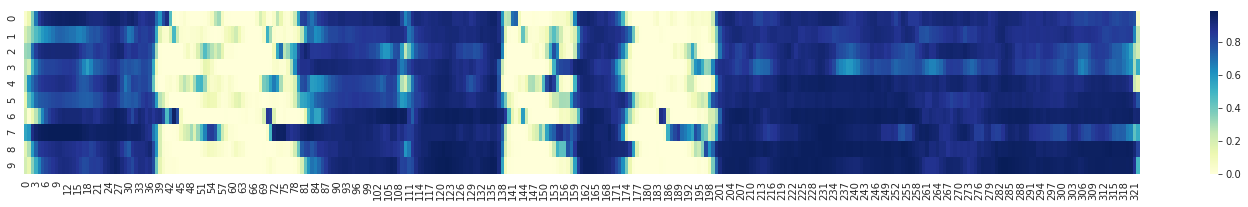

In [43]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 3c: 2 LSTM 💀 (one goes backwards, categorical_crossentropy, Batch norm)  : НЕ СХОДИЦЦА

In [0]:
def build_lstm_2_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = LSTM(features, return_sequences=True)(_out)   
  l2 = LSTM(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')  
  _out = BatchNormalization()(_out)
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy', 'categorical_accuracy'])
  model.summary()
  
  return model

In [18]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_2_model( np_LABELS.shape[-1] )


W0517 07:29:33.083522 140143259019136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

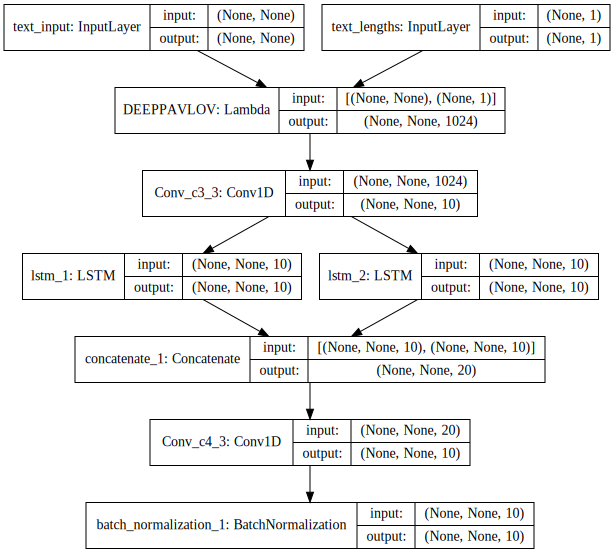

In [19]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

W0517 07:29:44.256615 140143259019136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 54s 481ms/step - loss: 0.2073 - acc: 0.1566 - categorical_accuracy: 0.1566 - val_loss: 0.1117 - val_acc: 0.5727 - val_categorical_accuracy: 0.5727
Epoch 2/40
112/112 [==============================] - 44s 397ms/step - loss: 0.2161 - acc: 0.1603 - categorical_accuracy: 0.1603 - val_loss: 0.1710 - val_acc: 0.0043 - val_categorical_accuracy: 0.0043
Epoch 3/40
112/112 [==============================] - 43s 386ms/step - loss: 0.1974 - acc: 0.2195 - categorical_accuracy: 0.2195 - val_loss: 0.1827 - val_acc: 0.0139 - val_categorical_accuracy: 0.0139
Epoch 4/40
112/112 [==============================] - 43s 386ms/step - loss: 0.1698 - acc: 0.2323 - categorical_accuracy: 0.2323 - val_loss: 0.1473 - val_acc: 0.0730 - val_categorical_accuracy: 0.0730
Epoch 5/40
112/112 [==============================] - 44s 392ms/step - loss: 0.2520 - acc: 0.2313 - categorical_accuracy: 0.2313 - val_loss: 0.1377 - v

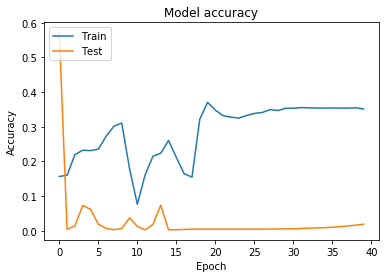

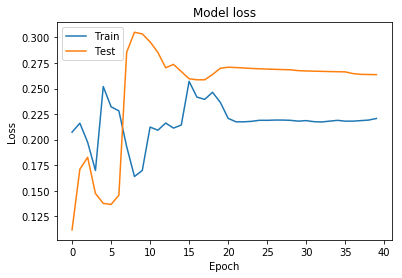

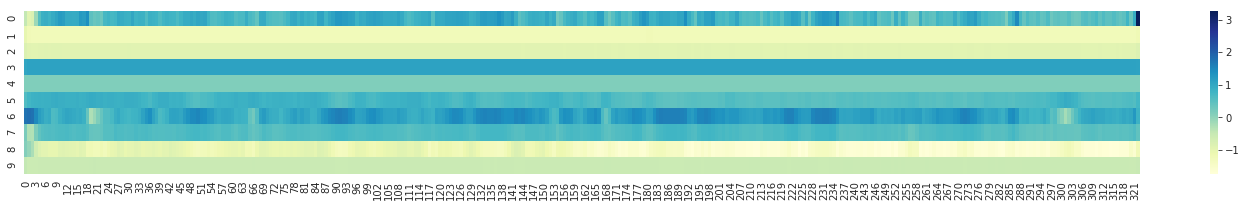

In [20]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 3d: 2 GRU 💔 ( categorical_crossentropy, sigmoid) : 

In [0]:
from keras.layers import GRU
def build_twin_GRU_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = GRU(features, return_sequences=True)(_out)   
  l2 = GRU(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')  
   
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  model.summary()
  
  return model

In [20]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_twin_GRU_model( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

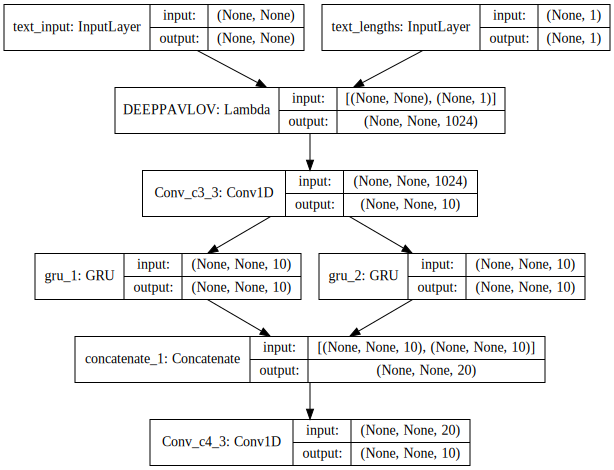

In [21]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

W0517 16:42:32.211768 139645435074432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 64s 570ms/step - loss: 0.0553 - acc: 0.0272 - val_loss: 0.0425 - val_acc: 0.0503
Epoch 2/40
112/112 [==============================] - 52s 467ms/step - loss: 0.0357 - acc: 0.0357 - val_loss: 0.0271 - val_acc: 0.0176
Epoch 3/40
112/112 [==============================] - 52s 466ms/step - loss: 0.0200 - acc: 0.0489 - val_loss: 0.0122 - val_acc: 0.1565
Epoch 4/40
112/112 [==============================] - 55s 488ms/step - loss: 0.0097 - acc: 0.1277 - val_loss: 0.0056 - val_acc: 0.2255
Epoch 5/40
112/112 [==============================] - 52s 465ms/step - loss: 0.0049 - acc: 0.1253 - val_loss: 0.0020 - val_acc: 0.1033
Epoch 6/40
112/112 [==============================] - 52s 465ms/step - loss: 0.0032 - acc: 0.0693 - val_loss: 0.0015 - val_acc: 0.0630
Epoch 7/40
112/112 [==============================] - 57s 509ms/step - loss: 0.0018 - acc: 0.0523 - val_loss: 0.0033 - val_acc: 0.0617
Epoch 8/40

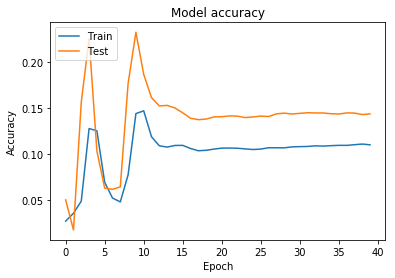

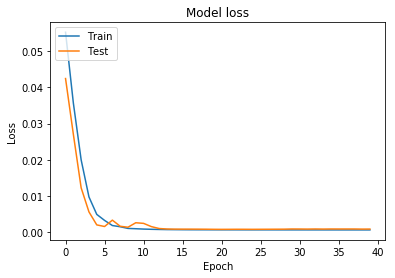

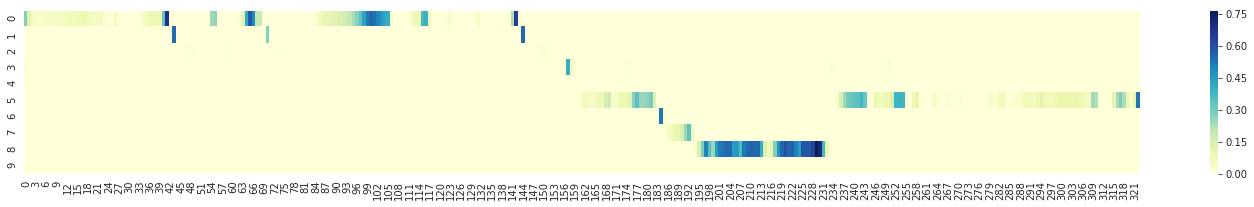

In [22]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=20)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 4:  CNN + dropout Model : Хуй тебе, а не сходимость

In [0]:
def build_cnn_only_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  d = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  d = Dropout(0.2)(d)

  conv_0 = get_conv_pool(d, 'c0', n=4, feature_maps=2, activation='sigmoid' )  
  conv_00 = get_conv_pool(d, 'blurry', n=10, feature_maps=2, activation='sigmoid' )  
  conv_1 = get_conv_pool(d, 'c1', n=3, feature_maps=features*2, activation='sigmoid' )  
  conv_2 = get_conv_pool(d, 'c2', n=5, feature_maps=features*2, activation='sigmoid')

  
  _out = Concatenate()([conv_00, conv_0, conv_1, conv_2]) 

  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid')

  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam)
  model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

  model.summary()
  
  return model

In [37]:

graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_cnn_only_model( np_LABELS.shape[-1] )
  
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, None, 1024)   0           DEEPPAVLOV[0][0]                 
__________

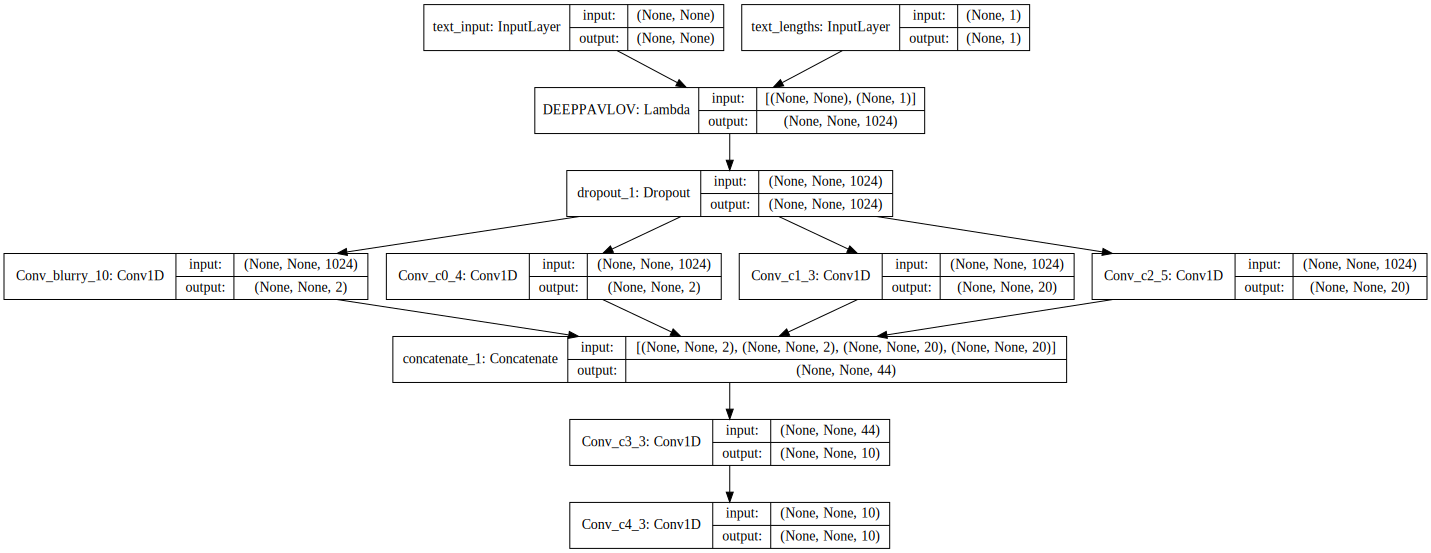

In [38]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 37s 327ms/step - loss: 4761.3759 - acc: 0.0054 - val_loss: 4637.2507 - val_acc: 0.4463
Epoch 2/40
112/112 [==============================] - 34s 304ms/step - loss: 4693.9329 - acc: 0.5722 - val_loss: 4485.2017 - val_acc: 0.9317
Epoch 3/40
112/112 [==============================] - 34s 304ms/step - loss: 4516.1258 - acc: 0.9188 - val_loss: 4289.9339 - val_acc: 0.9134
Epoch 4/40
112/112 [==============================] - 34s 304ms/step - loss: 4312.0085 - acc: 0.9326 - val_loss: 4024.1587 - val_acc: 0.9426
Epoch 5/40
112/112 [==============================] - 34s 303ms/step - loss: 3958.7491 - acc: 0.9542 - val_loss: 3652.1971 - val_acc: 0.9528
Epoch 6/40
112/112 [==============================] - 34s 303ms/step - loss: 3619.6507 - acc: 0.9573 - val_loss: 3459.0768 - val_acc: 0.9550
Epoch 7/40
112/112 [==============================] - 34s 303ms/step - loss: 3400.9779 - acc: 0.9575 - val_lo

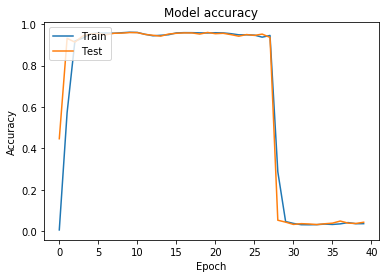

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7f7df5420c18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


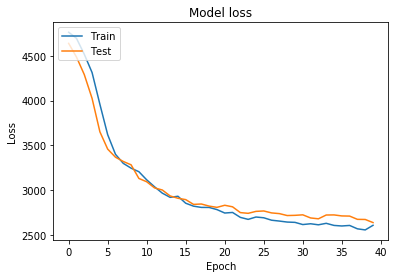

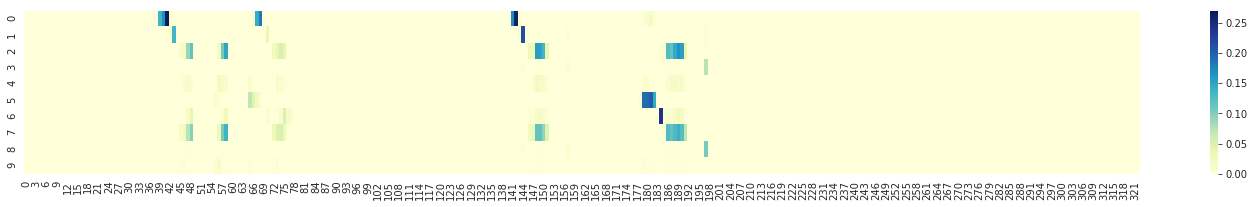

In [39]:

with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)
      
      

      



## 0a:  CNN   + BatchNormalization

In [0]:
from keras.layers import SpatialDropout1D
from keras import metrics

def build_cnn_only_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  d = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
#   d = SpatialDropout1D(0.1)(d)

  conv_0 = get_conv_pool(d, 'c0', n=4, feature_maps=2, activation='sigmoid' )  
  conv_00 = get_conv_pool(d, 'blurry', n=10, feature_maps=2, activation='sigmoid' )  
  conv_1 = get_conv_pool(d, 'c1', n=3, feature_maps=features*2, activation='sigmoid' )  
  conv_2 = get_conv_pool(d, 'c2', n=5, feature_maps=features*2, activation='sigmoid')

  
  _out = Concatenate()([conv_00, conv_0, conv_1, conv_2]) 

  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid')
  
  _out = BatchNormalization()(_out)

  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[metrics.mae, metrics.categorical_accuracy])
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=[metrics.mae, metrics.categorical_accuracy])

  model.summary()
  
  return model

In [32]:

graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_cnn_only_model( np_LABELS.shape[-1] )
  
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_blurry_10 (Conv1D)         (None, None, 2)      20482       DEEPPAVLOV[0][0]                 
__________

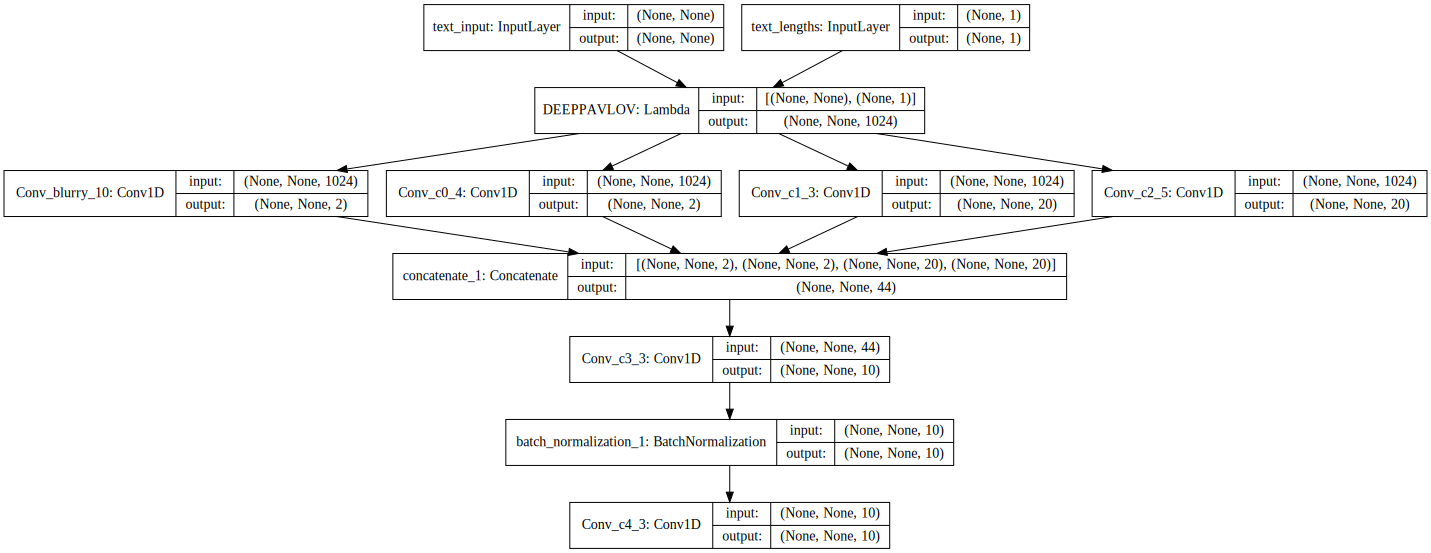

In [65]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [33]:

with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=30)
      #plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)
      
      

      
 

Train on 112 samples, validate on 38 samples
Epoch 1/40
112/112 [==============================] - 38s 343ms/step - loss: 0.0502 - mean_absolute_error: 0.5023 - categorical_accuracy: 0.1111 - val_loss: 0.0404 - val_mean_absolute_error: 0.6800 - val_categorical_accuracy: 0.1109
Epoch 2/40
112/112 [==============================] - 35s 313ms/step - loss: 0.0237 - mean_absolute_error: 0.5065 - categorical_accuracy: 0.1014 - val_loss: 0.0217 - val_mean_absolute_error: 0.7408 - val_categorical_accuracy: 0.0991
Epoch 3/40
112/112 [==============================] - 35s 313ms/step - loss: 0.0117 - mean_absolute_error: 0.4907 - categorical_accuracy: 0.0911 - val_loss: 0.0115 - val_mean_absolute_error: 0.7483 - val_categorical_accuracy: 0.0459
Epoch 4/40
112/112 [==============================] - 35s 313ms/step - loss: 0.0062 - mean_absolute_error: 0.4738 - categorical_accuracy: 0.0846 - val_loss: 0.0048 - val_mean_absolute_error: 0.7142 - val_categorical_accuracy: 0.0527
Epoch 5/40
112/112 [===

KeyboardInterrupt: ignored

In [0]:
color_matrix(pred[0], TEST_TOKENS)

In [0]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
